<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(3_6)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_3.6_n250.csv',
 'data_add_delta_3.6_n120.csv',
 'data_add_delta_3.6_n60.csv',
 'data_add_delta_3.6_n30.csv',
 'data_add_delta_3.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.935677,99.790111,60.114893,-2357.756624,-2127.915944,306.965838,-2434.881782
1,0.0,1.0,50.827318,98.569759,33.614322,9061.271323,9254.282722,821.159937,8433.122786
2,0.0,2.0,24.545988,66.595584,92.084440,-3497.542471,-3304.316459,-453.369804,-2850.946655
3,0.0,3.0,50.592609,23.761123,40.223137,-201.293274,-76.716406,318.277861,-394.994268
4,0.0,4.0,99.865925,78.981380,92.221617,-3481.811627,-3200.742705,-448.723677,-2752.019027
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,98.965268,24.498232,51.806091,317.211992,502.481584,-449.679914,952.161498
119996,999.0,116.0,93.743166,86.395752,41.932430,-1598.102997,-1366.031648,80.439422,-1446.471070
119997,999.0,117.0,71.090345,54.959510,21.168766,424.720176,581.938797,200.446080,381.492717
119998,999.0,118.0,49.795764,94.164855,23.509605,-4509.610804,-4332.140580,696.045271,-5028.185851


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.935677,99.790111,60.114893,-2357.756624,-2127.915944,306.965838,-2434.881782
1,0.0,1.0,50.827318,98.569759,33.614322,9061.271323,9254.282722,821.159937,8433.122786
2,0.0,2.0,24.545988,66.595584,92.084440,-3497.542471,-3304.316459,-453.369804,-2850.946655
3,0.0,3.0,50.592609,23.761123,40.223137,-201.293274,-76.716406,318.277861,-394.994268
4,0.0,4.0,99.865925,78.981380,92.221617,-3481.811627,-3200.742705,-448.723677,-2752.019027
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,98.965268,24.498232,51.806091,317.211992,502.481584,-449.679914,952.161498
119996,999.0,116.0,93.743166,86.395752,41.932430,-1598.102997,-1366.031648,80.439422,-1446.471070
119997,999.0,117.0,71.090345,54.959510,21.168766,424.720176,581.938797,200.446080,381.492717
119998,999.0,118.0,49.795764,94.164855,23.509605,-4509.610804,-4332.140580,696.045271,-5028.185851


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    59.935677  99.790111  60.114893 -2357.756624 -2127.915944   
      1.0    50.827318  98.569759  33.614322  9061.271323  9254.282722   
      2.0    24.545988  66.595584  92.084440 -3497.542471 -3304.316459   
      3.0    50.592609  23.761123  40.223137  -201.293274   -76.716406   
      4.0    99.865925  78.981380  92.221617 -3481.811627 -3200.742705   
...                ...        ...        ...          ...          ...   
999.0 115.0  98.965268  24.498232  51.806091   317.211992   502.481584   
      116.0  93.743166  86.395752  41.932430 -1598.102997 -1366.031648   
      117.0  71.090345  54.959510  21.168766   424.720176   581.938797   
      118.0  49.795764  94.164855  23.509605 -4509.610804 -4332.140580   
      119.0  85.504609  90.507280  48.522279  -607.169050  -372.634883   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    306.965838 -2434.881782  
      1.0    821.159937  8433.122786  
      2.0   -453.369804 -2850.946655  
      3.0    318.277861  -394.994268  
      4.0   -448.723677 -2752.019027  
...                 ...          ...  
999.0 115.0 -449.679914   952.161498  
      116.0   80.439422 -1446.471070  
      117.0  200.446080   381.492717  
      118.0  696.045271 -5028.185851  
      119.0  170.691580  -543.326463  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    59.935677  99.790111  60.114893 -2357.756624 -2127.915944   
      1.0    50.827318  98.569759  33.614322  9061.271323  9254.282722   
      2.0    24.545988  66.595584  92.084440 -3497.542471 -3304.316459   
      3.0    50.592609  23.761123  40.223137  -201.293274   -76.716406   
      4.0    99.865925  78.981380  92.221617 -3481.811627 -3200.742705   
...                ...        ...        ...          ...          ...   
999.0 115.0  98.965268  24.498232  51.806091   317.211992   502.481584   
      116.0  93.743166  86.395752  41.932430 -1598.102997 -1366.031648   
      117.0  71.090345  54.959510  21.168766   424.720176   581.938797   
      118.0  49.795764  94.164855  23.509605 -4509.610804 -4332.140580   
      119.0  85.504609  90.507280  48.522279  -607.169050  -372.634883   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    306.965838 -2434.881782  
      1.0    821.159937  8433.122786  
      2.0   -453.369804 -2850.946655  
      3.0    318.277861  -394.994268  
      4.0   -448.723677 -2752.019027  
...                 ...          ...  
999.0 115.0 -449.679914   952.161498  
      116.0   80.439422 -1446.471070  
      117.0  200.446080   381.492717  
      118.0  696.045271 -5028.185851  
      119.0  170.691580  -543.326463  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.935677,99.790111,60.114893,-2357.756624,-2127.915944,306.965838,-2434.881782
1,0.0,1.0,50.827318,98.569759,33.614322,9061.271323,9254.282722,821.159937,8433.122786
2,0.0,2.0,24.545988,66.595584,92.084440,-3497.542471,-3304.316459,-453.369804,-2850.946655
3,0.0,3.0,50.592609,23.761123,40.223137,-201.293274,-76.716406,318.277861,-394.994268
4,0.0,4.0,99.865925,78.981380,92.221617,-3481.811627,-3200.742705,-448.723677,-2752.019027
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,98.965268,24.498232,51.806091,317.211992,502.481584,-449.679914,952.161498
119996,999.0,116.0,93.743166,86.395752,41.932430,-1598.102997,-1366.031648,80.439422,-1446.471070
119997,999.0,117.0,71.090345,54.959510,21.168766,424.720176,581.938797,200.446080,381.492717
119998,999.0,118.0,49.795764,94.164855,23.509605,-4509.610804,-4332.140580,696.045271,-5028.185851


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    59.935677  99.790111  60.114893 -2357.756624 -2127.915944   
      1.0    50.827318  98.569759  33.614322  9061.271323  9254.282722   
      2.0    24.545988  66.595584  92.084440 -3497.542471 -3304.316459   
      3.0    50.592609  23.761123  40.223137  -201.293274   -76.716406   
      4.0    99.865925  78.981380  92.221617 -3481.811627 -3200.742705   
...                ...        ...        ...          ...          ...   
999.0 115.0  98.965268  24.498232  51.806091   317.211992   502.481584   
      116.0  93.743166  86.395752  41.932430 -1598.102997 -1366.031648   
      117.0  71.090345  54.959510  21.168766   424.720176   581.938797   
      118.0  49.795764  94.164855  23.509605 -4509.610804 -4332.140580   
      119.0  85.504609  90.507280  48.522279  -607.169050  -372.634883   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    306.965838 -2434.881782  
      1.0    821.159937  8433.122786  
      2.0   -453.369804 -2850.946655  
      3.0    318.277861  -394.994268  
      4.0   -448.723677 -2752.019027  
...                 ...          ...  
999.0 115.0 -449.679914   952.161498  
      116.0   80.439422 -1446.471070  
      117.0  200.446080   381.492717  
      118.0  696.045271 -5028.185851  
      119.0  170.691580  -543.326463  

[120000 rows x 7 columns]

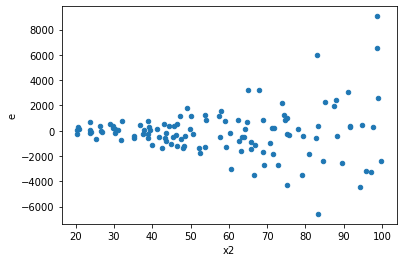

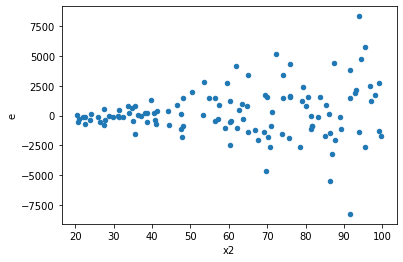

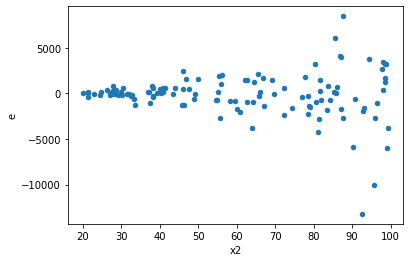

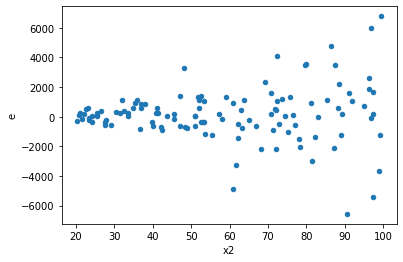

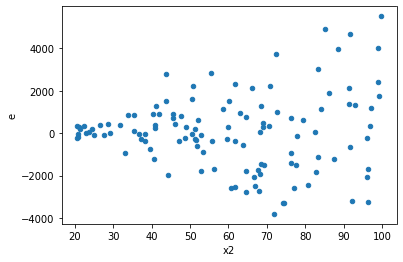

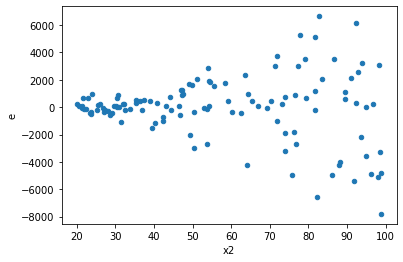

In [20]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,72515530.9574621,202062977.22981328,1611456.2434991577,4490288.38288474,2.7864786282588794,0.0008142604901610895,0.9995928697549195,0.00040713024508054474,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,57754177.46914833,339122906.87612987,1283426.165981074,7536064.5972473305,5.871833376162022,2.4494432926402965e-08,0.9999999877527835,1.2247216463201482e-08,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,85511867.60321034,263041647.25330573,1900263.7245157855,5845369.93896235,3.0760835264862165,0.0002558300464972074,0.9998720849767514,0.0001279150232486037,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,55581044.42662389,198914596.52684587,1235134.320591642,4420324.367263242,3.5788207756593313,3.764981235532261e-05,0.9999811750938223,1.8824906177661305e-05,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,192640612.4711068,235140718.12409073,4280902.4993579285,5225349.291646461,1.2206186177868301,0.5064241659937632,0.7467879170031184,0.2532120829968816,Reject005=1 : Homoscedasticity
9.0,45.0,45.0,98530587.8924047,309168663.37511826,2189568.6198312156,6870414.741669294,3.137793755099991,0.00020090169357156462,0.9998995491532142,0.00010045084678578231,Reject005=0 : Heteroscedasticity
10.0,45.0,45.0,23033613.552372023,323730812.4094173,511858.0789416005,7194018.053542606,14.05471233045321,3.3306690738754696e-15,0.9999999999999983,1.6653345369377348e-15,Reject005=0 : Heteroscedasticity
11.0,45.0,45.0,244547567.47190362,309804101.7200024,5434390.388264525,6884535.593777832,1.2668459757040773,0.4306730755775712,0.7846634622112144,0.2153365377887856,Reject005=1 : Homoscedasticity
14.0,45.0,45.0,60105655.408061,373976759.705113,1335681.2312902445,8310594.660113622,6.221989547675035,9.459488525820348e-09,0.9999999952702557,4.729744262910174e-09,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,72515530.9574621,202062977.22981328,1611456.2434991577,4490288.38288474,2.7864786282588794,0.0008142604901610895,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,57754177.46914833,339122906.87612987,1283426.165981074,7536064.5972473305,5.871833376162022,2.4494432926402965e-08,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,416430809.5982319,126218291.78916588,9254017.99107182,2804850.928648131,0.30309546959539324,0.00010764582684949285,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,85511867.60321034,263041647.25330573,1900263.7245157855,5845369.93896235,3.0760835264862165,0.0002558300464972074,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,55581044.42662389,198914596.52684587,1235134.320591642,4420324.367263242,3.5788207756593313,3.764981235532261e-05,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,398398701.3153535,117598070.56680146,8853304.473674523,2613290.4570400324,0.2951768421396444,7.687394154810197e-05,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,298967161.38782465,121179725.65799695,6643714.697507215,2692882.792399932,0.40532787980951795,0.003041696725132822,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,192640612.4711068,235140718.12409073,4280902.4993579285,5225349.291646461,1.2206186177868301,0.5064241659937632,Reject005=1 : Homoscedasticity
8.0,45.0,45.0,285943173.4146878,62602859.74601334,6354292.7425486185,1391174.6610225188,0.21893461906580935,1.2249191760822897e-06,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    718
Reject005=1 : Homoscedasticity      282
Name: Result_test, dtype: int64